In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [23]:
train_df = pd.read_csv("/kaggle/input/new-york-city-taxi-fare-prediction/train.csv",nrows = 2000000)
test_df = pd.read_csv("/kaggle/input/new-york-city-taxi-fare-prediction/test.csv")

In [24]:
train_df.reset_index(inplace=True)

In [25]:
train_df = train_df[train_df["fare_amount"]>0]
train_df = train_df.dropna()

In [26]:
print(train_df.shape)
y = train_df["fare_amount"]
X = train_df.drop("fare_amount",axis=1)

(1999853, 9)


In [27]:
df = pd.concat([X,test_df])
df["datetime"] = pd.to_datetime(df["key"])
df.drop(["key","pickup_datetime","index"],inplace=True,axis=1)
df["passenger_count"].replace({0:1})
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek
df['dayofweek'] = df['dayofweek'].astype(object)
df["diff_longitude"] = np.abs(df["pickup_longitude"] - df["dropoff_longitude"])
df["diff_latitude"] = np.abs(df["pickup_latitude"] - df["dropoff_latitude"])
df["man_distance"] = df["diff_longitude"] + df["diff_latitude"]
df["eu_distance"] = np.sqrt(df["diff_longitude"]**2 + df["diff_latitude"]**2)
df.drop(["datetime"],inplace=True,axis=1)
df = pd.get_dummies(df)
df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,diff_longitude,diff_latitude,man_distance,eu_distance,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0.002701,0.009041,0.011742,0.009436,1,0,0,0,0,0,0
1,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,0.036780,0.070701,0.107481,0.079696,0,1,0,0,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,0.008504,0.010708,0.019212,0.013674,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,0.004437,0.024949,0.029386,0.025340,0,0,0,0,0,1,0
4,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,0.011440,0.015754,0.027194,0.019470,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,12,0.012482,0.016609,0.029091,0.020776,0,0,0,0,0,0,1
9910,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,17,0.014702,0.027229,0.041931,0.030945,1,0,0,0,0,0,0
9911,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,20,0.201859,0.079597,0.281456,0.216985,0,0,0,0,0,0,1
9912,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,1,0.046394,0.066299,0.112694,0.080920,0,0,0,0,0,1,0


In [28]:
test_df = df[-9914:]
X = df[:-9914]

In [29]:
df = pd.concat([X,y],axis=1)


In [30]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,diff_longitude,...,man_distance,eu_distance,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,fare_amount
count,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,...,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06,1.999853e+06
mean,-7.252344e+01,3.992976e+01,-7.252452e+01,3.992839e+01,1.684131e+00,2.011740e+03,6.267856e+00,1.571024e+01,1.350832e+01,1.925217e-01,...,3.170520e-01,2.486415e-01,1.284274e-01,1.401163e-01,1.443846e-01,1.497135e-01,1.544694e-01,1.515116e-01,1.313772e-01,1.134873e+01
std,1.286759e+01,7.983193e+00,1.277354e+01,1.032346e+01,1.314985e+00,1.860520e+00,3.436761e+00,8.681921e+00,6.515700e+00,9.502822e+00,...,1.735765e+01,1.385870e+01,3.345652e-01,3.471077e-01,3.514794e-01,3.567905e-01,3.613982e-01,3.585470e-01,3.378125e-01,9.851742e+00
min,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
25%,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00,2.010000e+03,3.000000e+00,8.000000e+00,9.000000e+00,5.805969e-03,...,1.583000e-02,1.239749e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
50%,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075313e+01,1.000000e+00,2.012000e+03,6.000000e+00,1.600000e+01,1.400000e+01,1.244600e-02,...,2.764000e-02,2.144367e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.500000e+00
75%,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00,2.013000e+03,9.000000e+00,2.300000e+01,1.900000e+01,2.371200e-02,...,5.036800e-02,3.838861e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.250000e+01
max,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02,2.015000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.448388e+03,...,9.726488e+03,6.933843e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.273310e+03


In [31]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,diff_longitude,diff_latitude,man_distance,eu_distance,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,13.467420,0.023348,0.022133,0.045481,0.035146,0.146661,0.170668,0.162598,0.118620,0.129413,0.148780,0.123260
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,6.868584,0.036719,0.025589,0.055975,0.042459,0.353786,0.376237,0.369017,0.323357,0.335673,0.355889,0.328752
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,8.000000,0.006354,0.007278,0.017004,0.013261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,15.000000,0.013123,0.014715,0.029112,0.022423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,19.000000,0.024558,0.028261,0.052962,0.040170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,23.000000,0.849168,0.633213,1.479965,1.057330,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df = df[df["man_distance"]<1.5]
df = df[df["eu_distance"]<1.1]
df = df[df["diff_latitude"]<0.7]
df = df[df["diff_longitude"]<0.85]
df = df[df["passenger_count"]<=6]
df = df[df["pickup_longitude"]<-72]
df = df[df["pickup_latitude"]<42]
df = df[df["dropoff_longitude"]<-72]
df = df[df["dropoff_latitude"]<42]

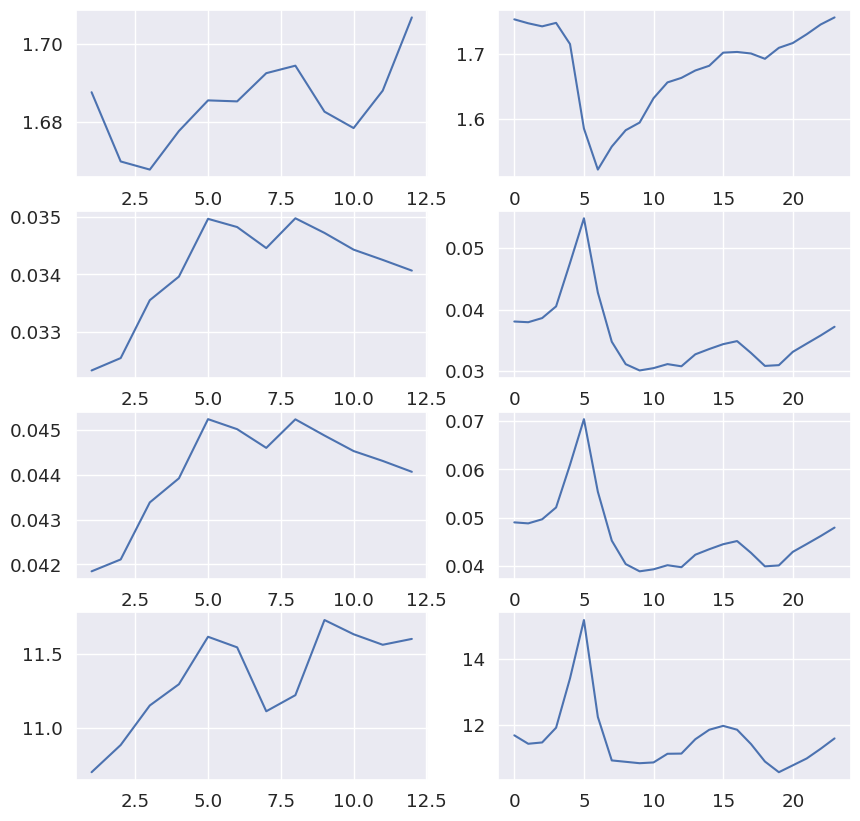

In [33]:
fig, ax = plt.subplots(4, 2, figsize = (10,10))
ax[0,0].plot(df.groupby("month").agg({"passenger_count":"mean"}))
ax[0,1].plot(df.groupby("hour").agg({"passenger_count":"mean"}))

ax[1,0].plot(df.groupby("month").agg({"eu_distance":"mean"}))
ax[1,1].plot(df.groupby("hour").agg({"eu_distance":"mean"}))

ax[2,0].plot(df.groupby("month").agg({"man_distance":"mean"}))
ax[2,1].plot(df.groupby("hour").agg({"man_distance":"mean"}))

ax[3,0].plot(df.groupby("month").agg({"fare_amount":"mean"}))
ax[3,1].plot(df.groupby("hour").agg({"fare_amount":"mean"}))

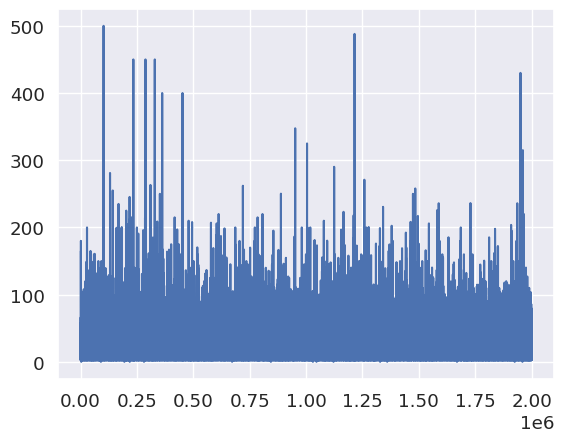

In [34]:
plt.plot(df["fare_amount"])

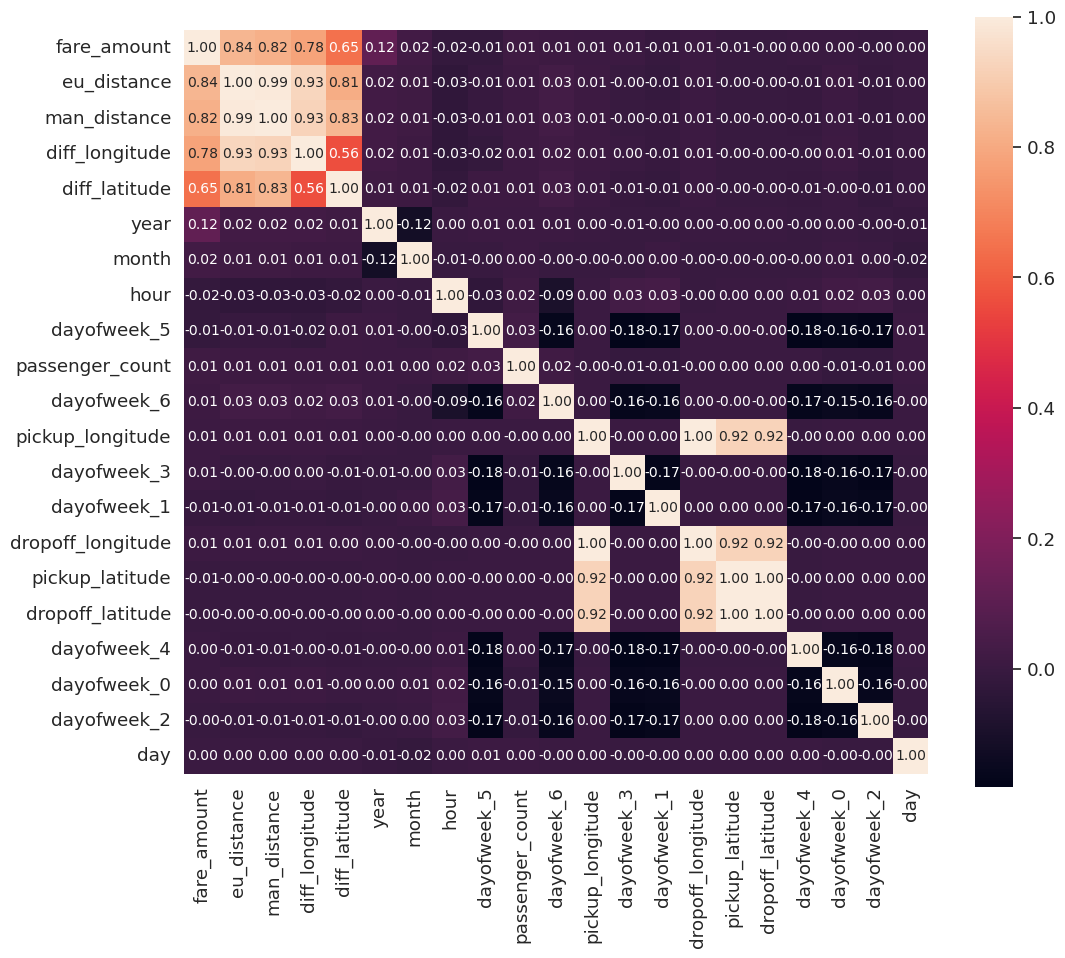

In [35]:
TARGET = "fare_amount"
k = 25
corrmat = df.corr()
corrmat = np.abs(corrmat)
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
y = df["fare_amount"]
X = df.drop("fare_amount",axis=1)

In [37]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)

In [39]:
cb_params = {
        "loss_function":'RMSE',
        'num_boost_round': 100,
        }

model_cb = cat.CatBoostRegressor(**cb_params)
model_cb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              early_stopping_rounds=100,
              verbose=100)

Learning rate set to 0.5
0:	learn: 6.4027926	test: 6.4027926	test1: 6.5713547	best: 6.5713547 (0)	total: 211ms	remaining: 20.9s
99:	learn: 3.7039685	test: 3.7039685	test1: 4.0759636	best: 4.0759636 (99)	total: 14.2s	remaining: 0us

bestTest = 4.07596356
bestIteration = 99



In [40]:
lgb_params = {
        'objective':'regression', 
        'metric': 'rmse', 
        'task': 'train', 
        'seed': 42,
        'n_estimators':20000
        }

model_lgb = lgb.LGBMRegressor(**lgb_params)
model_lgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              verbose=100,
              early_stopping_rounds=100)

[100]	training's rmse: 3.76897	valid_1's rmse: 4.08967
[200]	training's rmse: 3.62284	valid_1's rmse: 4.02886
[300]	training's rmse: 3.53515	valid_1's rmse: 4.00026
[400]	training's rmse: 3.4696	valid_1's rmse: 3.98594
[500]	training's rmse: 3.41053	valid_1's rmse: 3.97462
[600]	training's rmse: 3.36643	valid_1's rmse: 3.97055
[700]	training's rmse: 3.3261	valid_1's rmse: 3.96768
[800]	training's rmse: 3.29191	valid_1's rmse: 3.96168
[900]	training's rmse: 3.25791	valid_1's rmse: 3.96185


LGBMRegressor(metric='rmse', n_estimators=20000, objective='regression',
              seed=42, task='train')

In [41]:
xgb_params = {
        'objective': 'reg:squarederror',
        'seed':42,
        'n_estimators':20000
        }

model_xgb = xgb.XGBRegressor(**xgb_params)
model_xgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              early_stopping_rounds=100,
              verbose=100)

[0]	validation_0-rmse:10.63135	validation_1-rmse:10.73626
[100]	validation_0-rmse:3.32965	validation_1-rmse:3.97100
[200]	validation_0-rmse:3.14631	validation_1-rmse:3.95151
[300]	validation_0-rmse:3.03351	validation_1-rmse:3.94449
[400]	validation_0-rmse:2.93534	validation_1-rmse:3.93481
[495]	validation_0-rmse:2.86914	validation_1-rmse:3.93926


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

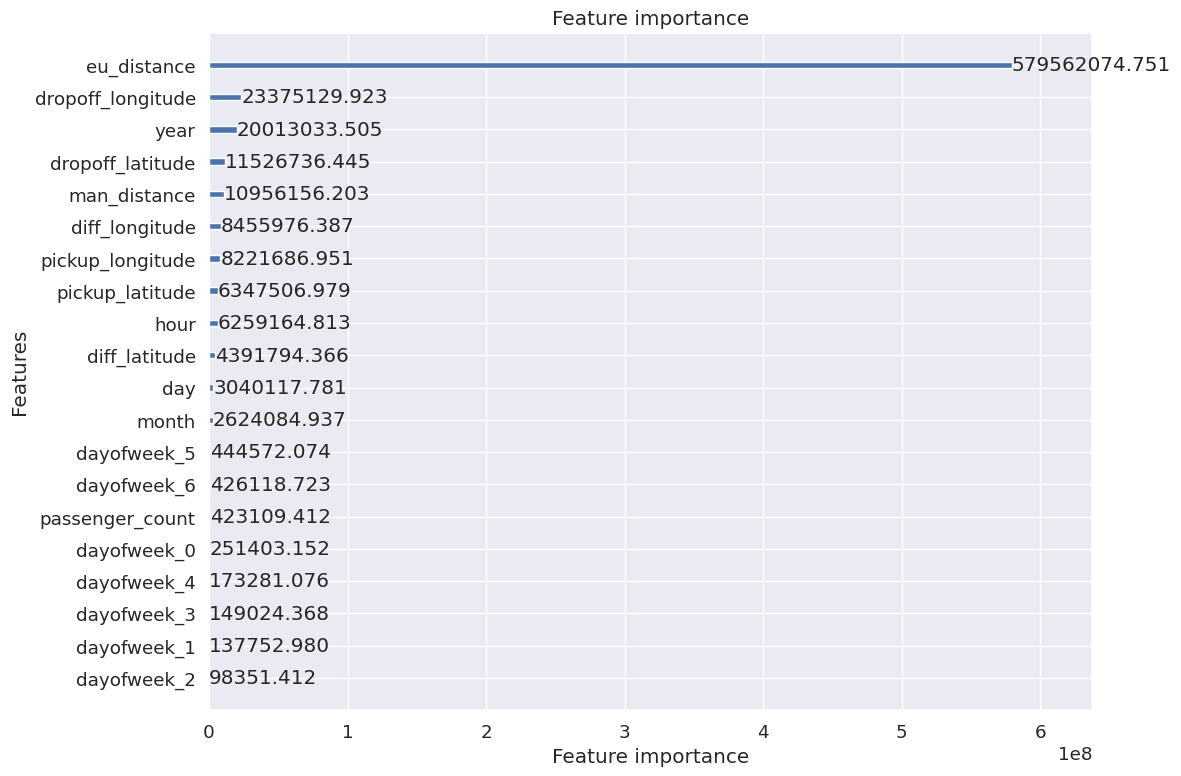

In [42]:
lgb.plot_importance(model_lgb, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()
plt.close()

In [43]:
sub = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv')
sub

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [45]:
sub["fare_amount"] = model_xgb.predict(test_df)
sub.to_csv('/kaggle/working/xgb.csv',index=False)

sub["fare_amount"] = model_lgb.predict(test_df)
sub.to_csv('/kaggle/working/lgb.csv',index=False)

sub["fare_amount"] = model_cb.predict(test_df)
sub.to_csv('/kaggle/working/cb.csv',index=False)